In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [7]:
# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(X_train)
# 创建决策树模型
decision_tree = DecisionTreeClassifier(random_state=42)

# 训练模型
decision_tree.fit(X_train, y_train)

# 预测测试集
predictions = decision_tree.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Training set: 105 samples
Test set: 45 samples
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5

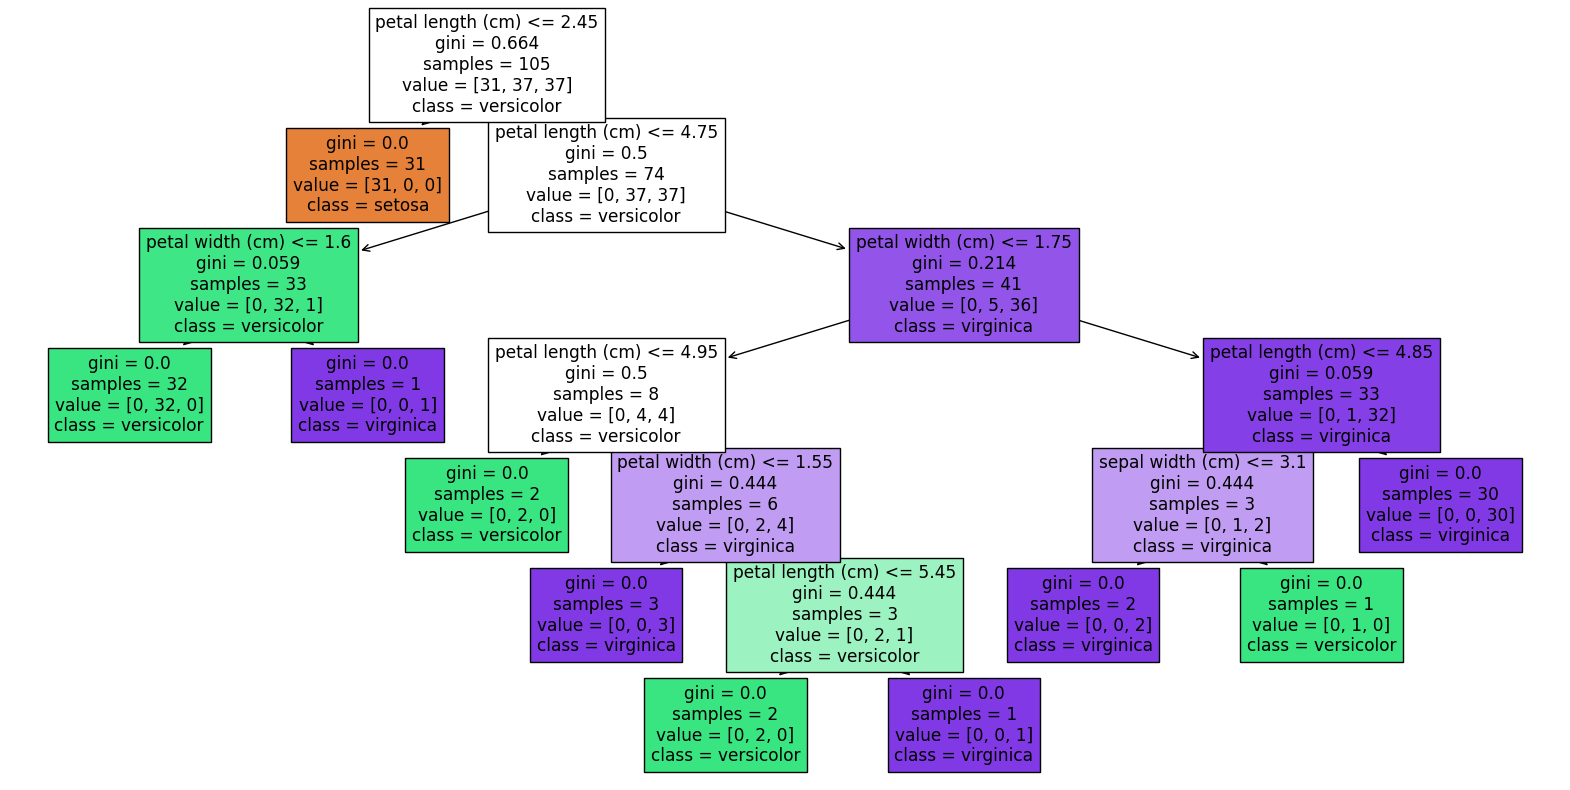

In [9]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 使用交叉验证获取不同ccp_alpha值的得分
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(tree, X_train, y_train, cv=5)
    scores.append(np.mean(score))

# 选择得分最高的ccp_alpha值
best_ccp_alpha = ccp_alphas[np.argmax(scores)]
print("Best ccp_alpha:", best_ccp_alpha)


Best ccp_alpha: 0.0


In [12]:
# 使用最佳ccp_alpha值剪枝
tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
tree_pruned.fit(X_train, y_train)

# 评估剪枝后的模型
score = tree_pruned.score(X_test, y_test)
print("Accuracy of pruned tree:", score)


Accuracy of pruned tree: 1.0


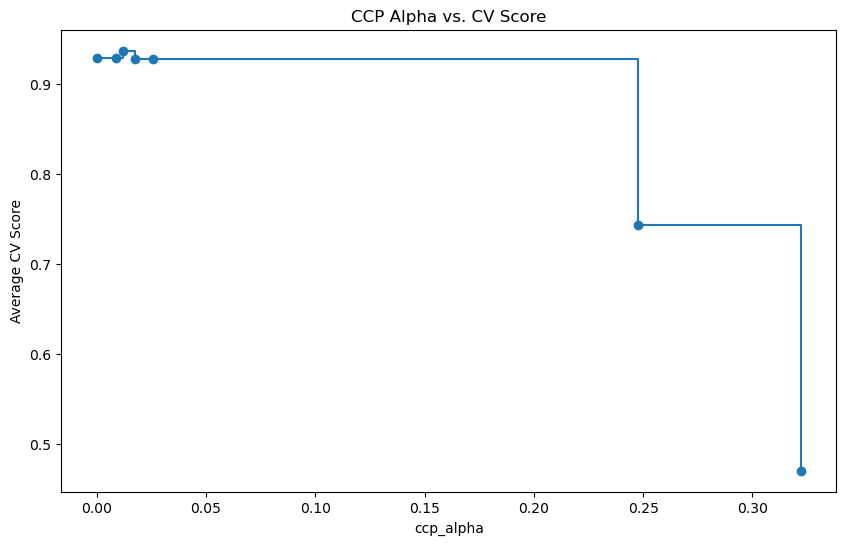

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

# 训练一个没有剪枝的决策树
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 使用成本复杂性剪枝路径
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 对于每个ccp_alpha，训练一个决策树并记录交叉验证得分
scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    score = cross_val_score(tree, X_train, y_train, cv=5)
    scores.append(np.mean(score))

# 可视化ccp_alpha值和交叉验证得分
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, scores, marker='o', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Average CV Score')
plt.title('CCP Alpha vs. CV Score')
plt.show()
